In [ ]:
import pandas as pd


df = pd.read_csv('grade.csv')
df

Accuracy-note   Completeness-note Relevance-note  \
0                    initializes paths"?  stdout/stdin? cli?            NaN   
1           creating and managing paths?       stdin/stdout?            NaN   
2                                    NaN                 NaN            NaN   
3    duplicates = consecutive duplicates                 NaN            NaN   
4                                    NaN                 NaN            NaN   
..                                   ...                 ...            ...   
475                                  NaN          stdin/out?            NaN   
476  duplicates = consecutive duplicates           out outs?            NaN   
477                                  NaN                 NaN            NaN   
478                                  NaN                 NaN            NaN   
479                                  NaN                 NaN            NaN   

                                Understandability-note Formatting-note  \
0                                                  NaN             NaN   
1                                                  NaN             NaN   
2                                                  NaN             NaN   
3    redundnant note about empty list check. Too de...             NaN   
4                                                  NaN             NaN   
..                                                 ...             ...   
475                                                NaN             NaN   
476                                                NaN             NaN   
477             and version list length comparison"???             NaN   
478                                                NaN             NaN   
479                                                NaN             NaN   

     Accuracy  Completeness  Relevance  Understandability  Formatting  \
0         2.0           1.0        3.0                3.0         3.0   
1         2.0           2.0        3.0                3.0         3.0   
2         3.0           3.0        3.0                3.0         3.0   
3         2.0           3.0        3.0                2.0         3.0   
4         3.0           3.0        3.0                3.0         3.0   
..        ...           ...        ...                ...         ...   
475       3.0           2.0        3.0                3.0         3.0   
476       2.0           2.0        3.0                3.0         3.0   
477       3.0           3.0        3.0                2.0         3.0   
478       3.0           3.0        3.0                3.0         3.0   
479       3.0           3.0        3.0                3.0         3.0   

    General-note                               Model  \
0            NaN  out_anthropic-claude-3-7-sonnet-or   
1            NaN  out_anthropic-claude-3-7-sonnet-or   
2            NaN  out_anthropic-claude-3-7-sonnet-or   
3            NaN  out_anthropic-claude-3-7-sonnet-or   
4            NaN  out_anthropic-claude-3-7-sonnet-or   
..           ...                                 ...   
475          NaN         out_deepseek-deepseek-r1-or   
476          NaN         out_deepseek-deepseek-r1-or   
477          NaN         out_deepseek-deepseek-r1-or   
478          NaN         out_deepseek-deepseek-r1-or   
479          NaN         out_deepseek-deepseek-r1-or   

                                                Answer       Prompt  Doctest  \
0    <explanation>\nThis code implements a program ...    just_task      1.0   
1    <explanation>\nThe `program-data-storage` clas...    just_task      1.0   
2    <explanation>\nThe `program-data` class repres...    just_task      1.0   
3    <explanation>\nThe `actualized` method is part...    just_task      1.0   
4    <explanation>\nThe `program-version` class rep...    just_task      1.0   
..                                                 ...          ...      ...   
475  ```\n<explanation>\nThe `program-data-storage`...  no_examples      2.0   

In [ ]:
# Ensure absence of invalid numeric values (NaN or negative)

numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop('Doctest', errors='ignore')
numeric_cols = numeric_cols.drop('Output Quality', errors='ignore')
numeric_cols = numeric_cols.drop('Place', errors='ignore')

negative_or_nan_condition = df[numeric_cols].lt(0) | df[numeric_cols].isna() | df[numeric_cols].gt(3)

df[negative_or_nan_condition.any(axis=1)]


Empty DataFrame
Columns: [Accuracy-note, Completeness-note, Relevance-note, Understandability-note, Formatting-note, Accuracy, Completeness, Relevance, Understandability, Formatting, General-note, Model, Answer, Prompt, Doctest, Place]
Index: []

In [ ]:
# Normalize some numeric df fields so that it reflects how much it divereges from average of this column

import pandas as pd

numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop('Doctest', errors='ignore')
numeric_cols = numeric_cols.drop('Output Quality', errors='ignore')
numeric_cols = numeric_cols.drop('Place', errors='ignore')


# Normalize numeric columns
for col in numeric_cols:
    # Calculate mean for the column
    col_mean = df[col].mean()

    df[col] = (df[col] - col_mean) / col_mean

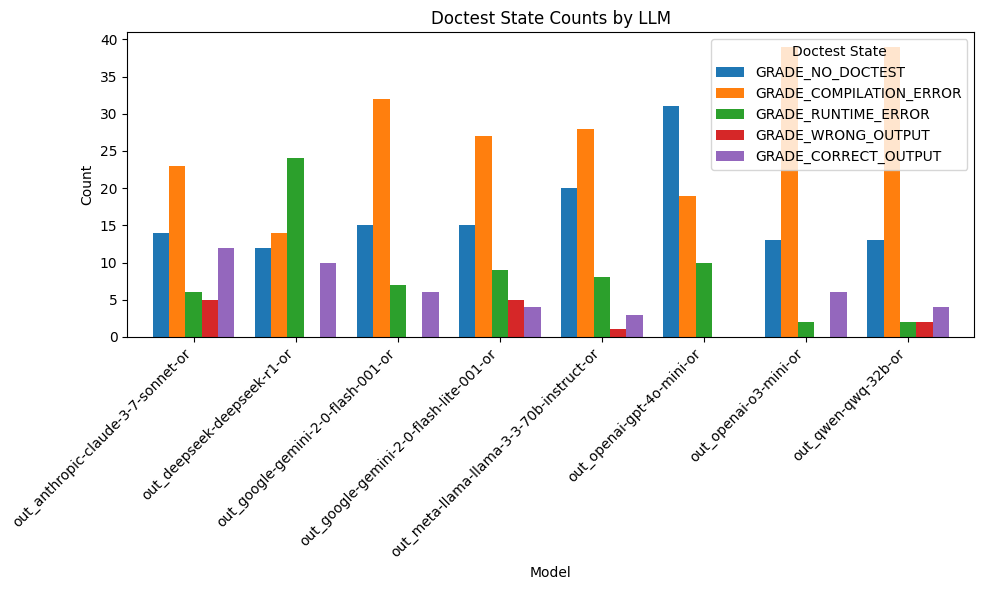

In [ ]:
# Plot Doctest state('Doctest') by LLM('Model')
# Label mapping:
# ```
# GRADE_NO_DOCTEST = 0
# GRADE_COMPILATION_ERROR = 1
# GRADE_RUNTIME_ERROR = 2
# GRADE_WRONG_OUTPUT = 3
# GRADE_CORRECT_OUTPUT = 4
# ```

import matplotlib.pyplot as plt

# Count occurrences of each Doctest state for each LLM
doctest_counts = df.groupby(['Model', 'Doctest']).size().unstack(fill_value=0)

# Define the order of states and corresponding labels
state_order = [0, 1, 2, 3, 4]
state_labels = ['GRADE_NO_DOCTEST', 'GRADE_COMPILATION_ERROR', 'GRADE_RUNTIME_ERROR', 'GRADE_WRONG_OUTPUT', 'GRADE_CORRECT_OUTPUT']

# Create the bar plot
ax = doctest_counts.loc[:, state_order].plot(kind='bar', figsize=(10, 6), width=0.8)

# Customize the plot
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Doctest State Counts by LLM')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Doctest State', labels=state_labels)


plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


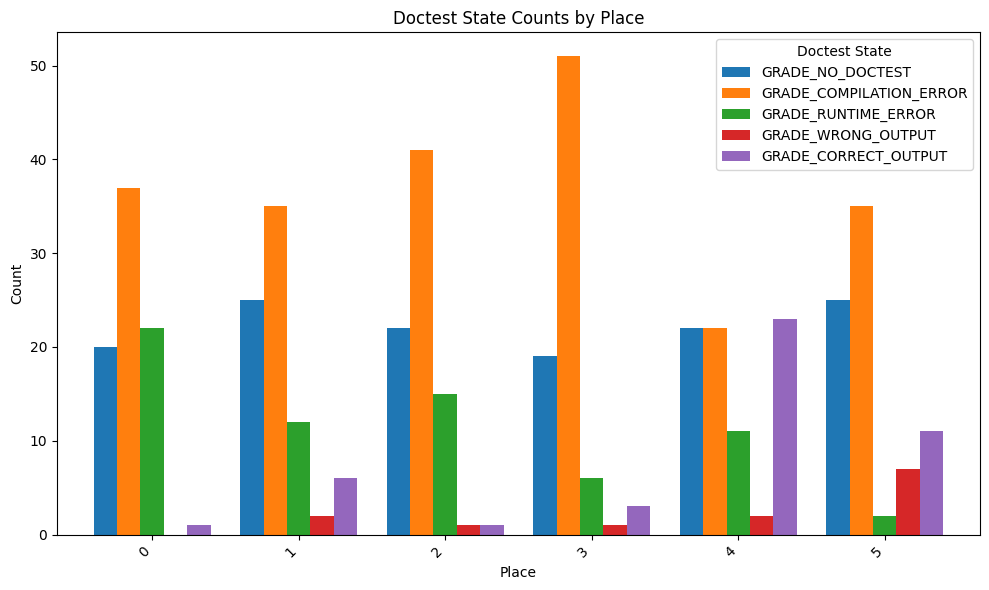

In [ ]:
# Plot Doctest state('Doctest') by place in code that is being documented('Place')
# Label mapping:
# ```
# GRADE_NO_DOCTEST = 0
# GRADE_COMPILATION_ERROR = 1
# GRADE_RUNTIME_ERROR = 2
# GRADE_WRONG_OUTPUT = 3
# GRADE_CORRECT_OUTPUT = 4
# ```

import matplotlib.pyplot as plt

# Count occurrences of each Doctest state for each LLM
doctest_counts = df.groupby(['Place', 'Doctest']).size().unstack(fill_value=0)

# Define the order of states and corresponding labels
state_order = [0, 1, 2, 3, 4]
state_labels = ['GRADE_NO_DOCTEST', 'GRADE_COMPILATION_ERROR', 'GRADE_RUNTIME_ERROR', 'GRADE_WRONG_OUTPUT', 'GRADE_CORRECT_OUTPUT']

# Create the bar plot
ax = doctest_counts.loc[:, state_order].plot(kind='bar', figsize=(10, 6), width=0.8)

# Customize the plot
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Doctest State Counts by Place')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Doctest State', labels=state_labels)


plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# Add output quality column based

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the output quality
df['Output Quality'] = (df['Accuracy']*3 + df['Completeness'] + df['Relevance'] + df['Understandability'] * 0.5 + df['Formatting'] * 0.1)

# Display the DataFrame with the new column
df


Accuracy-note   Completeness-note Relevance-note  \
0                    initializes paths"?  stdout/stdin? cli?            NaN   
1           creating and managing paths?       stdin/stdout?            NaN   
2                                    NaN                 NaN            NaN   
3    duplicates = consecutive duplicates                 NaN            NaN   
4                                    NaN                 NaN            NaN   
..                                   ...                 ...            ...   
475                                  NaN          stdin/out?            NaN   
476  duplicates = consecutive duplicates           out outs?            NaN   
477                                  NaN                 NaN            NaN   
478                                  NaN                 NaN            NaN   
479                                  NaN                 NaN            NaN   

                                Understandability-note Formatting-note  \
0                                                  NaN             NaN   
1                                                  NaN             NaN   
2                                                  NaN             NaN   
3    redundnant note about empty list check. Too de...             NaN   
4                                                  NaN             NaN   
..                                                 ...             ...   
475                                                NaN             NaN   
476                                                NaN             NaN   
477             and version list length comparison"???             NaN   
478                                                NaN             NaN   
479                                                NaN             NaN   

     Accuracy  Completeness  Relevance  Understandability  Formatting  \
0   -0.267735     -0.548023   0.100917           0.103448    0.042345   
1   -0.267735     -0.096045   0.100917           0.103448    0.042345   
2    0.098398      0.355932   0.100917           0.103448    0.042345   
3   -0.267735      0.355932   0.100917          -0.264368    0.042345   
4    0.098398      0.355932   0.100917           0.103448    0.042345   
..        ...           ...        ...                ...         ...   
475  0.098398     -0.096045   0.100917           0.103448    0.042345   
476 -0.267735     -0.096045   0.100917           0.103448    0.042345   
477  0.098398      0.355932   0.100917          -0.264368    0.042345   
478  0.098398      0.355932   0.100917           0.103448    0.042345   
479  0.098398      0.355932   0.100917           0.103448    0.042345   

    General-note                               Model  \
0            NaN  out_anthropic-claude-3-7-sonnet-or   
1            NaN  out_anthropic-claude-3-7-sonnet-or   
2            NaN  out_anthropic-claude-3-7-sonnet-or   
3            NaN  out_anthropic-claude-3-7-sonnet-or   
4            NaN  out_anthropic-claude-3-7-sonnet-or   
..           ...                                 ...   
475          NaN         out_deepseek-deepseek-r1-or   
476          NaN         out_deepseek-deepseek-r1-or   
477          NaN         out_deepseek-deepseek-r1-or   
478          NaN         out_deepseek-deepseek-r1-or   
479          NaN         out_deepseek-deepseek-r1-or   

                                                Answer       Prompt  Doctest  \
0    <explanation>\nThis code implements a program ...    just_task      1.0   
1    <explanation>\nThe `program-data-storage` clas...    just_task      1.0   
2    <explanation>\nThe `program-data` class repres...    just_task      1.0   
3    <explanation>\nThe `actualized` method is part...    just_task      1.0   
4    <explanation>\nThe `program-version` class rep...    just_task      1.0   
..                                                 ...          ...      ...   
475  ```\n<explanation>\nThe `program-data-storage`...  no_examples      2.0   

In [ ]:
# Consider 'success' doctest when >= GRADE_COMPILATION_ERROR

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the output quality
df['Doctest Success'] = (df['Doctest'] >= 2)

# Display the DataFrame with the new column
df

Accuracy-note   Completeness-note Relevance-note  \
0                    initializes paths"?  stdout/stdin? cli?            NaN   
1           creating and managing paths?       stdin/stdout?            NaN   
2                                    NaN                 NaN            NaN   
3    duplicates = consecutive duplicates                 NaN            NaN   
4                                    NaN                 NaN            NaN   
..                                   ...                 ...            ...   
475                                  NaN          stdin/out?            NaN   
476  duplicates = consecutive duplicates           out outs?            NaN   
477                                  NaN                 NaN            NaN   
478                                  NaN                 NaN            NaN   
479                                  NaN                 NaN            NaN   

                                Understandability-note Formatting-note  \
0                                                  NaN             NaN   
1                                                  NaN             NaN   
2                                                  NaN             NaN   
3    redundnant note about empty list check. Too de...             NaN   
4                                                  NaN             NaN   
..                                                 ...             ...   
475                                                NaN             NaN   
476                                                NaN             NaN   
477             and version list length comparison"???             NaN   
478                                                NaN             NaN   
479                                                NaN             NaN   

     Accuracy  Completeness  Relevance  Understandability  Formatting  \
0   -0.267735     -0.548023   0.100917           0.103448    0.042345   
1   -0.267735     -0.096045   0.100917           0.103448    0.042345   
2    0.098398      0.355932   0.100917           0.103448    0.042345   
3   -0.267735      0.355932   0.100917          -0.264368    0.042345   
4    0.098398      0.355932   0.100917           0.103448    0.042345   
..        ...           ...        ...                ...         ...   
475  0.098398     -0.096045   0.100917           0.103448    0.042345   
476 -0.267735     -0.096045   0.100917           0.103448    0.042345   
477  0.098398      0.355932   0.100917          -0.264368    0.042345   
478  0.098398      0.355932   0.100917           0.103448    0.042345   
479  0.098398      0.355932   0.100917           0.103448    0.042345   

    General-note                               Model  \
0            NaN  out_anthropic-claude-3-7-sonnet-or   
1            NaN  out_anthropic-claude-3-7-sonnet-or   
2            NaN  out_anthropic-claude-3-7-sonnet-or   
3            NaN  out_anthropic-claude-3-7-sonnet-or   
4            NaN  out_anthropic-claude-3-7-sonnet-or   
..           ...                                 ...   
475          NaN         out_deepseek-deepseek-r1-or   
476          NaN         out_deepseek-deepseek-r1-or   
477          NaN         out_deepseek-deepseek-r1-or   
478          NaN         out_deepseek-deepseek-r1-or   
479          NaN         out_deepseek-deepseek-r1-or   

                                                Answer       Prompt  Doctest  \
0    <explanation>\nThis code implements a program ...    just_task      1.0   
1    <explanation>\nThe `program-data-storage` clas...    just_task      1.0   
2    <explanation>\nThe `program-data` class repres...    just_task      1.0   
3    <explanation>\nThe `actualized` method is part...    just_task      1.0   
4    <explanation>\nThe `program-version` class rep...    just_task      1.0   
..                                                 ...          ...      ...   
475  ```\n<explanation>\nThe `program-data-storage`...  no_examples      2.0   

In [ ]:
# Compare Output Quality by LLMs grouped by doctest success

import altair as alt

# Create the bar chart
alt.Chart(df).mark_bar().encode(
    x='Model:N',
    y='mean(Output Quality):Q',
    color='Doctest Success:N',
    column='Doctest Success:N'
).properties(width=200)


alt.Chart(...)

In [ ]:
# Calculate pearson correlation between Doctest Success and Output Quality. Also calculate statitstical significance

from scipy.stats import linregress

new = df[['Output Quality', 'Doctest Success']].copy()
new["Doctest Success"] = new["Doctest Success"].astype(float)

linregress(x=new["Doctest Success"], y=new["Output Quality"])

LinregressResult(slope=np.float64(0.029500299715508084), intercept=np.float64(-0.007743828675321031), rvalue=np.float64(0.018463554702812728), pvalue=np.float64(0.6865834345255948), stderr=np.float64(0.07306731082523678), intercept_stderr=np.float64(0.03743585683136339))

In [ ]:
# Compare Output Quality by LLMs

import altair as alt

# Create the bar chart
alt.Chart(df).mark_bar().encode(
    y='mean(Output Quality):Q',
    color='Model:N',
    column='Model:N'
).properties(width=200)


alt.Chart(...)

In [ ]:
# Calculate pearson correlation between usage of the reasoning technique and Output Quality. Also calculate statitstical significance

from scipy.stats import linregress

# Predefined set of models
reasoning_models = {'out_deepseek-deepseek-r1-or',
 'out_openai-o3-mini-or',
 'out_qwen-qwq-32b-or'}
df['Is Reasoning Model'] = df['Model'].isin(reasoning_models)

new = df[['Output Quality', 'Is Reasoning Model']].copy()
new["Is Reasoning Model"] = new["Is Reasoning Model"].astype(float)

linregress(x=new["Is Reasoning Model"], y=new["Output Quality"])


LinregressResult(slope=np.float64(0.2501217256821316), intercept=np.float64(-0.0937956471307995), rvalue=np.float64(0.17224645078624726), pvalue=np.float64(0.00014927539553538953), stderr=np.float64(0.06542551882233398), intercept_stderr=np.float64(0.040064784317893704))

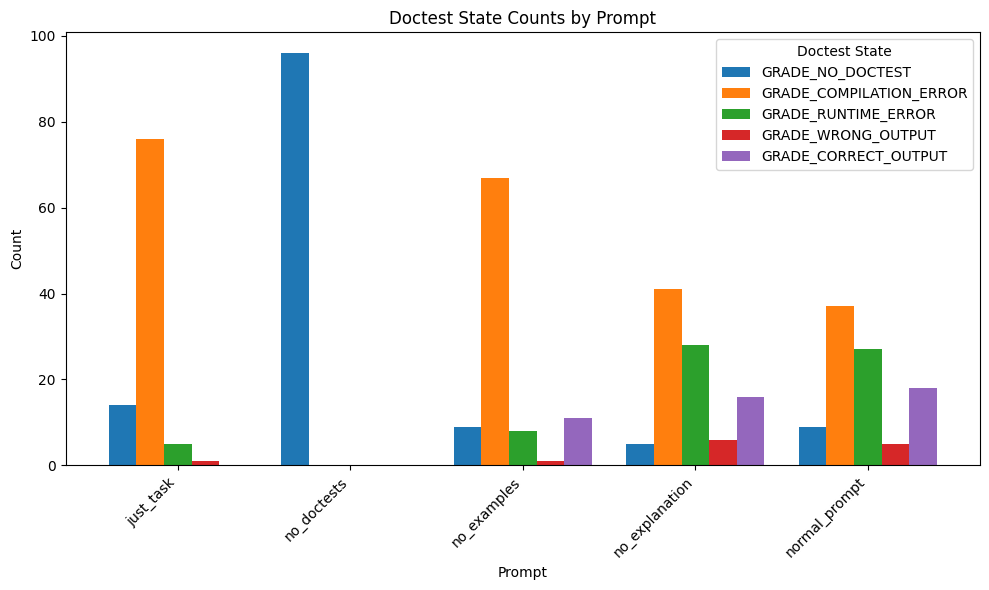

In [ ]:
# Plot Doctest state('Doctest') by Prompt
# Label mapping:
# ```
# GRADE_NO_DOCTEST = 0
# GRADE_COMPILATION_ERROR = 1
# GRADE_RUNTIME_ERROR = 2
# GRADE_WRONG_OUTPUT = 3
# GRADE_CORRECT_OUTPUT = 4
# ```

import matplotlib.pyplot as plt

# Count occurrences of each Doctest state for each LLM
doctest_counts = df.groupby(['Prompt', 'Doctest']).size().unstack(fill_value=0)

# Define the order of states and corresponding labels
state_order = [0, 1, 2, 3, 4]
state_labels = ['GRADE_NO_DOCTEST', 'GRADE_COMPILATION_ERROR', 'GRADE_RUNTIME_ERROR', 'GRADE_WRONG_OUTPUT', 'GRADE_CORRECT_OUTPUT']

# Create the bar plot
ax = doctest_counts.loc[:, state_order].plot(kind='bar', figsize=(10, 6), width=0.8)

# Customize the plot
plt.xlabel('Prompt')
plt.ylabel('Count')
plt.title('Doctest State Counts by Prompt')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Doctest State', labels=state_labels)


plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# Plot: ouput quality(y) by model (x) by prompt (multiple labeled neighboring vertical bars)

import altair as alt

# Create the bar chart
alt.Chart(df).mark_bar().encode(
    x='Model:N',  # Nominal encoding for the model (x-axis)
    y='mean(Output Quality):Q',  # Quantitative encoding for the output quality (y-axis)
    color='Prompt:N',  # Use the 'Prompt' column for color encoding
    column='Prompt:N'  # Use 'Prompt' column for creating columns of bar charts
).properties(width=200)


alt.Chart(...)

In [ ]:
# Create bar chart using Altair for output quality
alt.Chart(df).mark_bar().encode(
    x='Prompt:N',
    y='mean(Output Quality):Q',
    color='Model:N',
    column='Model:N'
).properties(width=200)


alt.Chart(...)

In [ ]:
# Create bar chart using Altair for accuracy
alt.Chart(df).mark_bar().encode(
    x='Prompt:N',
    y='mean(Accuracy):Q',
    color='Model:N',
    column='Model:N'
).properties(width=200)

alt.Chart(...)

In [ ]:
# Create bar chart using Altair for completeness
alt.Chart(df).mark_bar().encode(
    x='Prompt:N',
    y='mean(Completeness):Q',
    color='Model:N',
    column='Model:N'
).properties(width=200)

alt.Chart(...)

In [ ]:
# Create bar chart using Altair for relevance
alt.Chart(df).mark_bar().encode(
    x='Prompt:N',
    y='mean(Relevance):Q',
    color='Model:N',
    column='Model:N'
).properties(width=200)


alt.Chart(...)

In [ ]:
# Create bar chart using Altair for understandability
alt.Chart(df).mark_bar().encode(
    x='Prompt:N',
    y='mean(Understandability):Q',
    color='Model:N',
    column='Model:N'
).properties(width=200)

alt.Chart(...)